#Семинар 1. Бизнес-кейс: "Оценка стоимости жилой недвижимости в г.Москва".#

Для тех, кто решил продать или купить квартиру в любом районе г.Москва, можно провести быструю онлайн оценку стоимости квартиры и правильно назначить цену продажи или сориентироваться относительно стоимости покупки.

Следует понимать, что онлайн-оценка носит ориентировочный характер, поскольку на цену конкретной квартиры влияет целый ряд факторов, таких как: состояние жилья, планировка, вид из окон, инфрастрктура, район, экология и много другое.

В таблице формата Excel собрана информация о стоимости одно-, двух-, трехкомнатных квартир в многоквартирных домах в г.Москва за 2020 год. Информация получена с сайта [Cian].

Для онлайн-оценки стоимости жилой недвижимости можно воспользоваться множественной линейной регрессией, поскольку предположительно стоимость жилья линейно зависит от ряда факторов. 
Зависимая переменная – цена жилой недвижимости в рублях `price`.

Факторы, от которых зависит стоимость жилой недвижимости:

|Имя переменной|Метка переменной|Значение|
|------------------------|:-----------------------|:------------------------|
|`type_sale`|Тип жилья|0 – новостройка; 1 – вторичное жилье|
|`rooms`|Количество комнат||
|`sqm_total`|Общая площадь квартиры в кв.м.||
|`sqm_living`|Жилай площадь квартиры в кв.м.||
|`sqm_kitch`|Площадь кухни в кв.м.||
|`floors`|Количество этажей в доме||
|`view`|Вид из окна|1 – во двор; 2  – на улицу; 3  – на улицу и во двор|
|`bathroom`|Тип санузла|1 – раздельный; 2 – совмещенный; 3  – более одного|
|`type`|Тип дома|1 – панельный; 2 – кирпичный; 3 – монолитный; 4 – блочный; 5 – монолитно-кирпичный|
|`dist_metro`|Расстояние до метро в минутах||
|`station`|Ближайшая станция метро||
|`yr_built`|Год постройки дома||
|`district`|Округ г.Москва|1 – СВАО; 2 – САО; 3 – СЗАО; 4 – ЗАО; 5 – ЮЗАО; 6 – ЦАО|
|`quarte`|Квартал ввода в эксплуатацию дома||

[Cian]: https://cian.ru

###**1 Подготовка данных для моделирования.**


####***1.1 Откроем таблицу***

In [ ]:
import pandas as pd

In [ ]:
df_apartment = pd.read_excel(r'/content/drive/MyDrive/HSE/Data Sciense for Bisiness/Москва_исходные_данные.xlsx')

In [ ]:
df_apartment.head()

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
0,1,11600000,0,2,51.0,32.0,8.5,17,10,1.0,1.0,1.0,9,Верхние лихоборы,2015.0,2,NaN
1,2,12900000,1,2,52.9,28.1,12.0,22,3,1.0,1.0,2.0,11,Верхние лихоборы,2016.0,2,NaN
2,3,10590000,1,2,44.0,28.0,6.0,12,7,2.0,1.0,3.0,,Верхние лихоборы,1968.0,2,NaN
3,4,9100000,1,2,45.0,30.0,6.0,12,3,2.0,1.0,3.0,4,Верхние лихоборы,1966.0,2,NaN
4,5,10600000,1,1,36.0,17.0,10.0,20,11,1.0,2.0,3.0,10,Окружная,2018.0,1,NaN


In [ ]:
display(df_apartment)

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
0,1,11600000,0,2,51.0,32.0,8.5,17,10,1.0,1.0,1.0,9,Верхние лихоборы,2015.0,2,NaN
1,2,12900000,1,2,52.9,28.1,12.0,22,3,1.0,1.0,2.0,11,Верхние лихоборы,2016.0,2,NaN
2,3,10590000,1,2,44.0,28.0,6.0,12,7,2.0,1.0,3.0,,Верхние лихоборы,1968.0,2,NaN
3,4,9100000,1,2,45.0,30.0,6.0,12,3,2.0,1.0,3.0,4,Верхние лихоборы,1966.0,2,NaN
4,5,10600000,1,1,36.0,17.0,10.0,20,11,1.0,2.0,3.0,10,Окружная,2018.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,10700000,1,2,36.5,21.0,8.0,9,3,1.0,2.0,4.0,3,ВДНХ,1962.0,1,NaN
226,227,13350000,1,2,42.2,25.0,9.0,25,19,2.0,2.0,1.0,5,ВДНХ,1982.0,1,NaN
227,228,8700000,1,1,30.0,17.0,7.5,8,6,1.0,2.0,2.0,15,ВДНХ,1960.0,1,NaN
228,229,12400000,0,1,39.8,15.7,9.7,38,2,1.0,2.0,5.0,16,Ботанический сад,2023.0,1,4.0


In [ ]:
df_apartment[df_apartment['floors']==2]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
102,103,15000000,1,2,75.0,50.0,5.0,2,2,1.0,2.0,NaN,6,Селигерская,2019.0,2,NaN


####***1.2 Посмотрим на характеристику таблицы***

Оценим пропуски, среднее значение, стандартное отклонение, минимум, максимум.

In [ ]:
df_apartment.describe()

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,yr_built,district,quarte
count,230.000000,2.300000e+02,230.000000,230.000000,230.000000,226.000000,228.000000,230.000000,230.000000,189.000000,229.000000,223.000000,227.000000,230.000000,45.000000
mean,115.500000,1.137054e+07,0.730435,1.517391,43.808348,22.170708,9.371711,17.356522,8.491304,1.439153,1.733624,2.690583,1994.193833,2.252174,2.755556
std,66.539462,2.273013e+06,0.444702,0.542638,10.158558,9.609359,5.050806,10.265209,7.454515,0.646390,0.557056,1.169527,26.980612,1.043537,1.170772
min,1.000000,7.000000e+06,0.000000,0.000000,20.500000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1917.000000,1.000000,1.000000
25%,58.250000,9.500000e+06,0.000000,1.000000,36.600000,17.000000,6.000000,9.000000,3.000000,1.000000,1.000000,2.000000,1967.000000,2.000000,2.000000
50%,115.500000,1.130000e+07,1.000000,2.000000,41.650000,21.000000,8.850000,16.000000,6.000000,1.000000,2.000000,3.000000,2004.000000,2.000000,3.000000
75%,172.750000,1.344402e+07,1.000000,2.000000,50.175000,29.000000,11.300000,23.000000,12.000000,2.000000,2.000000,3.000000,2020.000000,2.000000,4.000000
max,230.000000,1.515000e+07,1.000000,3.000000,82.700000,57.000000,27.000000,60.000000,32.000000,3.000000,3.000000,5.000000,2023.000000,6.000000,4.000000


In [ ]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N           230 non-null    int64  
 1   price       230 non-null    int64  
 2   type_sale   230 non-null    int64  
 3   rooms       230 non-null    int64  
 4   sqm_total   230 non-null    float64
 5   sqm_living  226 non-null    float64
 6   sqm_kitch   228 non-null    float64
 7   floors      230 non-null    int64  
 8   floor       230 non-null    int64  
 9   view        189 non-null    float64
 10  bathroom    229 non-null    float64
 11  type        223 non-null    float64
 12  dist_metro  230 non-null    object 
 13  station     230 non-null    object 
 14  yr_built    227 non-null    float64
 15  district    230 non-null    int64  
 16  quarte      45 non-null     float64
dtypes: float64(8), int64(7), object(2)
memory usage: 30.7+ KB


In [ ]:
df_apartment[df_apartment['floors']==2]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
102,103,15000000,1,2,75.0,50.0,5.0,2,2,1.0,2.0,NaN,6,Селигерская,2019.0,2,NaN


####***1.3 Год постройки дома***

Можно заметить, что у признака `yr_built` присутствует три пропуска. Посмотрим на эти значения и примем решение об их удаление.

In [ ]:
df_apartment[df_apartment['yr_built'].isnull()]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
21,22,9500000,1,2,45.0,30.0,6.0,5,3,1.0,2.0,1.0,8,Коптево,NaN,2,NaN
45,46,9750000,1,1,33.0,17.0,8.0,4,1,2.0,2.0,2.0,5,Сокол,NaN,2,NaN
127,128,9430000,1,1,37.8,11.1,18.9,21,5,NaN,1.0,NaN,5,Водный стадион,NaN,2,NaN


In [ ]:
df_apartment.dropna(subset=['yr_built'], inplace=True)
#df_aparment = df_apartment[df_apartment['yr_built'].astype(bool)]
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 229
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N           227 non-null    int64  
 1   price       227 non-null    int64  
 2   type_sale   227 non-null    int64  
 3   rooms       227 non-null    int64  
 4   sqm_total   227 non-null    float64
 5   sqm_living  223 non-null    float64
 6   sqm_kitch   225 non-null    float64
 7   floors      227 non-null    int64  
 8   floor       227 non-null    int64  
 9   view        187 non-null    float64
 10  bathroom    226 non-null    float64
 11  type        221 non-null    float64
 12  dist_metro  227 non-null    object 
 13  station     227 non-null    object 
 14  yr_built    227 non-null    float64
 15  district    227 non-null    int64  
 16  quarte      45 non-null     float64
dtypes: float64(8), int64(7), object(2)
memory usage: 31.9+ KB


Не знаю более крутого способа, как переустановить индексы. Ибо если мы попытаемся обратиться к таблицу по индексу удаленной строчки, то выводится ошибка.

In [ ]:
df_apartment = df_apartment.reset_index(drop=True)

In [ ]:
df_apartment[df_apartment['floors']==2]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
100,103,15000000,1,2,75.0,50.0,5.0,2,2,1.0,2.0,NaN,6,Селигерская,2019.0,2,NaN


####***1.4 Количество комнат***

Посмотрим на количество квартир, количество комнат которых равно нулю. Что же это может значить?

In [ ]:
df_apartment['rooms'].value_counts()

2    111
1    111
3      4
0      1
Name: rooms, dtype: int64

In [ ]:
df_apartment[df_apartment['rooms'] == 0]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
64,67,9100000,0,0,25.75,0.0,0.0,22,6,NaN,2.0,3.0,11,Динамо,2022.0,2,2.0


In [ ]:
df_apartment = df_apartment[df_apartment['rooms'] != 0]
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N           226 non-null    int64  
 1   price       226 non-null    int64  
 2   type_sale   226 non-null    int64  
 3   rooms       226 non-null    int64  
 4   sqm_total   226 non-null    float64
 5   sqm_living  222 non-null    float64
 6   sqm_kitch   224 non-null    float64
 7   floors      226 non-null    int64  
 8   floor       226 non-null    int64  
 9   view        187 non-null    float64
 10  bathroom    225 non-null    float64
 11  type        220 non-null    float64
 12  dist_metro  226 non-null    object 
 13  station     226 non-null    object 
 14  yr_built    226 non-null    float64
 15  district    226 non-null    int64  
 16  quarte      44 non-null     float64
dtypes: float64(8), int64(7), object(2)
memory usage: 31.8+ KB


####***1.5 Жилая площадь квартиры и кухни***

Посмотрим на пропущенные значения в данных для признаков `sqm_living`, `sqm_kitch`. 

In [ ]:
df_apartment['sqm_living'].value_counts()

20.0    15
0.0     13
30.0    11
32.0     7
17.0     7
        ..
21.4     1
11.2     1
21.3     1
16.7     1
15.7     1
Name: sqm_living, Length: 113, dtype: int64

Заметим, что существует 13 квартир площадь жилой площади которой равняется нулю. Посмотрим на эти квартиры.

In [ ]:
df_apartment[df_apartment['sqm_living'] == 0]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
58,61,11961000,1,2,47.00,0.0,0.0,15,7,1.0,2.0,3.0,2,ЦСКА,2016.0,2,NaN
59,62,14812000,1,2,58.20,0.0,0.0,15,7,2.0,2.0,3.0,2,ЦСКА,2017.0,2,NaN
60,63,13990000,1,1,44.30,0.0,0.0,12,6,2.0,2.0,5.0,7,Динамо,2020.0,2,NaN
66,69,11717012,0,2,46.57,0.0,0.0,21,2,NaN,2.0,5.0,12,Савеловская,2022.0,2,4.0
67,70,14889930,0,1,37.40,0.0,0.0,7,3,NaN,2.0,3.0,13,Улица 1905 года,2020.0,6,NaN
70,73,14000000,1,1,45.70,0.0,0.0,44,2,1.0,2.0,5.0,8,Улица 1905 года,2018.0,6,NaN
75,78,11000000,1,2,57.00,0.0,0.0,17,12,2.0,3.0,3.0,4,Беломорская,2018.0,2,NaN
86,89,14500000,0,2,46.60,0.0,0.0,17,9,3.0,2.0,3.0,7,Войковская,2021.0,2,3.0
106,109,11200000,1,2,52.30,0.0,0.0,10,7,NaN,2.0,5.0,11,Марьина роща,2020.0,1,NaN
115,118,14725000,0,1,47.50,0.0,0.0,9,4,NaN,2.0,3.0,9,Войковская,2020.0,2,NaN


И ровно в этих же квартирах отсутствует информация о площади кухни

In [ ]:
df_apartment[df_apartment['sqm_kitch'] == 0]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
58,61,11961000,1,2,47.00,0.0,0.0,15,7,1.0,2.0,3.0,2,ЦСКА,2016.0,2,NaN
59,62,14812000,1,2,58.20,0.0,0.0,15,7,2.0,2.0,3.0,2,ЦСКА,2017.0,2,NaN
60,63,13990000,1,1,44.30,0.0,0.0,12,6,2.0,2.0,5.0,7,Динамо,2020.0,2,NaN
66,69,11717012,0,2,46.57,0.0,0.0,21,2,NaN,2.0,5.0,12,Савеловская,2022.0,2,4.0
67,70,14889930,0,1,37.40,0.0,0.0,7,3,NaN,2.0,3.0,13,Улица 1905 года,2020.0,6,NaN
70,73,14000000,1,1,45.70,0.0,0.0,44,2,1.0,2.0,5.0,8,Улица 1905 года,2018.0,6,NaN
75,78,11000000,1,2,57.00,0.0,0.0,17,12,2.0,3.0,3.0,4,Беломорская,2018.0,2,NaN
86,89,14500000,0,2,46.60,0.0,0.0,17,9,3.0,2.0,3.0,7,Войковская,2021.0,2,3.0
106,109,11200000,1,2,52.30,0.0,0.0,10,7,NaN,2.0,5.0,11,Марьина роща,2020.0,1,NaN
115,118,14725000,0,1,47.50,0.0,0.0,9,4,NaN,2.0,3.0,9,Войковская,2020.0,2,NaN


Однако мы можем вывести среднее отношение жилой площади к площади и кухни к площади. Для этого посчитаем во всех остальных квартирах это отношение и усредним.

In [ ]:
propotrion_sqm_living_to_total = (df_apartment['sqm_living'] / df_apartment['sqm_total']).mean()
propotrion_sqm_kitch_to_total = (df_apartment['sqm_kitch'] / df_apartment['sqm_total']).mean()

In [ ]:
print("Доля к общей площади у:")
print("жилого помещения:", propotrion_sqm_living_to_total)
print("кухни:", propotrion_sqm_kitch_to_total)

Доля к общей площади у:
жилого помещения: 0.508298234721055
кухни: 0.21682034493513216


Теперь восполним пропуски.

In [ ]:
df_apartment.loc[df_apartment['sqm_kitch'].isna(), 'sqm_kitch'] = df_apartment[df_apartment['sqm_kitch'].isna()]['sqm_total'] * propotrion_sqm_kitch_to_total

In [ ]:
df_apartment[58:69]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
58,61,11961000,1,2,47.00,0.0,0.0,15,7,1.0,2.0,3.0,2,ЦСКА,2016.0,2,NaN
59,62,14812000,1,2,58.20,0.0,0.0,15,7,2.0,2.0,3.0,2,ЦСКА,2017.0,2,NaN
60,63,13990000,1,1,44.30,0.0,0.0,12,6,2.0,2.0,5.0,7,Динамо,2020.0,2,NaN
61,64,14900000,1,2,40.00,24.0,10.0,18,5,1.0,2.0,3.0,7,Динамо,2018.0,2,NaN
62,65,10500000,1,1,32.00,14.0,6.0,9,2,1.0,1.0,2.0,14,Динамо,1965.0,2,NaN
63,66,14000000,1,2,52.00,29.0,7.0,6,2,3.0,1.0,2.0,16,Белорусская,1917.0,2,NaN
65,68,11050000,1,1,34.20,20.0,8.0,16,13,1.0,2.0,4.0,14,Белорусская,1975.0,2,NaN
66,69,11717012,0,2,46.57,0.0,0.0,21,2,NaN,2.0,5.0,12,Савеловская,2022.0,2,4.0
67,70,14889930,0,1,37.40,0.0,0.0,7,3,NaN,2.0,3.0,13,Улица 1905 года,2020.0,6,NaN
68,71,14500000,1,1,43.00,20.0,10.0,44,21,2.0,2.0,5.0,8,Улица 1905 года,2018.0,6,NaN


In [ ]:
df_apartment.loc[df_apartment['sqm_living'].isna(), 'sqm_living'] = df_apartment[df_apartment['sqm_living'].isna()]['sqm_total'] * propotrion_sqm_living_to_total

In [ ]:
df_apartment[58:69]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
58,61,11961000,1,2,47.00,0.0,0.0,15,7,1.0,2.0,3.0,2,ЦСКА,2016.0,2,NaN
59,62,14812000,1,2,58.20,0.0,0.0,15,7,2.0,2.0,3.0,2,ЦСКА,2017.0,2,NaN
60,63,13990000,1,1,44.30,0.0,0.0,12,6,2.0,2.0,5.0,7,Динамо,2020.0,2,NaN
61,64,14900000,1,2,40.00,24.0,10.0,18,5,1.0,2.0,3.0,7,Динамо,2018.0,2,NaN
62,65,10500000,1,1,32.00,14.0,6.0,9,2,1.0,1.0,2.0,14,Динамо,1965.0,2,NaN
63,66,14000000,1,2,52.00,29.0,7.0,6,2,3.0,1.0,2.0,16,Белорусская,1917.0,2,NaN
65,68,11050000,1,1,34.20,20.0,8.0,16,13,1.0,2.0,4.0,14,Белорусская,1975.0,2,NaN
66,69,11717012,0,2,46.57,0.0,0.0,21,2,NaN,2.0,5.0,12,Савеловская,2022.0,2,4.0
67,70,14889930,0,1,37.40,0.0,0.0,7,3,NaN,2.0,3.0,13,Улица 1905 года,2020.0,6,NaN
68,71,14500000,1,1,43.00,20.0,10.0,44,21,2.0,2.0,5.0,8,Улица 1905 года,2018.0,6,NaN


In [ ]:
df_apartment['sqm_kitch'].value_counts()

6.00     27
10.00    27
7.00     14
0.00     13
9.00     12
         ..
21.90     1
20.40     1
17.76     1
22.99     1
6.70      1
Name: sqm_kitch, Length: 84, dtype: int64

In [ ]:
df_apartment[df_apartment['sqm_living'].isna()]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte


In [ ]:
df_apartment[df_apartment['floors']==2]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte
100,103,15000000,1,2,75.0,50.0,5.0,2,2,1.0,2.0,NaN,6,Селигерская,2019.0,2,NaN


####***1.6 Вид из окна***

Взглянем на значения этого признака.

In [ ]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N           226 non-null    int64  
 1   price       226 non-null    int64  
 2   type_sale   226 non-null    int64  
 3   rooms       226 non-null    int64  
 4   sqm_total   226 non-null    float64
 5   sqm_living  226 non-null    float64
 6   sqm_kitch   226 non-null    float64
 7   floors      226 non-null    int64  
 8   floor       226 non-null    int64  
 9   view        187 non-null    float64
 10  bathroom    225 non-null    float64
 11  type        220 non-null    float64
 12  dist_metro  226 non-null    object 
 13  station     226 non-null    object 
 14  yr_built    226 non-null    float64
 15  district    226 non-null    int64  
 16  quarte      44 non-null     float64
dtypes: float64(8), int64(7), object(2)
memory usage: 31.8+ KB


In [ ]:
df_apartment['view'].value_counts()

1.0    121
2.0     50
3.0     16
Name: view, dtype: int64

In [ ]:
len(df_apartment[df_apartment['view'].isna()])

39

Большое количество значений признака `view` являюстся пропущенными. Заменим пропущенные значения переменной `0` "не указан".

In [ ]:
df_apartment.loc[df_apartment['view'].isna(), 'view'] = 0

Применем операцию one-hot encoding для кодирования категориального признака `view`, воспользовавшись встроенной функцией Pandas `get_dummies`.

In [ ]:
df_apartment['view'] = df_apartment['view'].astype('int64')

In [ ]:
view_1 = []
for el in df_apartment['view']:
  if el == (1 or 3):
    view_1.append(1)
  else:
    view_1.append(0)

In [ ]:
view_2 = []
for el in df_apartment['view']:
  if el == (2 or 3):
    view_2.append(1)
  else:
    view_2.append(0)

In [ ]:
view_3 = []
for el in df_apartment['view']:
  if el == 0:
    view_3.append(1)
  else:
    view_3.append(0)

In [ ]:
df_apartment = df_apartment.assign(view_1 = view_1)
df_apartment = df_apartment.assign(view_2 = view_2)
df_apartment = df_apartment.assign(view_3 = view_3)
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N           226 non-null    int64  
 1   price       226 non-null    int64  
 2   type_sale   226 non-null    int64  
 3   rooms       226 non-null    int64  
 4   sqm_total   226 non-null    float64
 5   sqm_living  226 non-null    float64
 6   sqm_kitch   226 non-null    float64
 7   floors      226 non-null    int64  
 8   floor       226 non-null    int64  
 9   view        226 non-null    int64  
 10  bathroom    225 non-null    float64
 11  type        220 non-null    float64
 12  dist_metro  226 non-null    object 
 13  station     226 non-null    object 
 14  yr_built    226 non-null    float64
 15  district    226 non-null    int64  
 16  quarte      44 non-null     float64
 17  view_1      226 non-null    int64  
 18  view_2      226 non-null    int64  
 19  view_3      226 non-null    i

In [ ]:
df_apartment.head()

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte,view_1,view_2,view_3
0,1,11600000,0,2,51.0,32.0,8.5,17,10,1,1.0,1.0,9,Верхние лихоборы,2015.0,2,NaN,1,0,0
1,2,12900000,1,2,52.9,28.1,12.0,22,3,1,1.0,2.0,11,Верхние лихоборы,2016.0,2,NaN,1,0,0
2,3,10590000,1,2,44.0,28.0,6.0,12,7,2,1.0,3.0,,Верхние лихоборы,1968.0,2,NaN,0,1,0
3,4,9100000,1,2,45.0,30.0,6.0,12,3,2,1.0,3.0,4,Верхние лихоборы,1966.0,2,NaN,0,1,0
4,5,10600000,1,1,36.0,17.0,10.0,20,11,1,2.0,3.0,10,Окружная,2018.0,1,NaN,1,0,0


In [ ]:
df_apartment[df_apartment['floors']==2]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte,view_1,view_2,view_3
100,103,15000000,1,2,75.0,50.0,5.0,2,2,1,2.0,NaN,6,Селигерская,2019.0,2,NaN,1,0,0


####***1.7 Санузел***

Этот признак имеет один пропуск. Его бы было не критично всего навсего удалить. Но давайте проверим, можно ли его как-то восстановить. Взглянем на аналогичные постройки.

In [ ]:
df_apartment[df_apartment['bathroom'].isna()]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte,view_1,view_2,view_3
22,24,8909890,0,1,35.0,14.0,12.3,20,17,0,NaN,3.0,9,Алексеевская,2021.0,1,4.0,0,0,1


In [ ]:
df_apartment[df_apartment['yr_built']==2021]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,bathroom,type,dist_metro,station,yr_built,district,quarte,view_1,view_2,view_3
10,11,8528211,0,1,38.90,13.6,11.3,25,9,0,2.0,3.0,9,Лихоборы,2021.0,2,3.0,0,0,1
13,14,11452600,0,1,34.60,11.7,12.2,29,27,1,2.0,NaN,3,Дмитровская,2021.0,2,1.0,1,0,0
22,24,8909890,0,1,35.00,14.0,12.3,20,17,0,NaN,3.0,9,Алексеевская,2021.0,1,4.0,0,0,1
42,44,13995000,0,1,62.20,19.5,15.5,24,3,1,2.0,3.0,2,Верхние лихоборы,2021.0,2,2.0,1,0,0
71,74,13072896,0,1,46.08,14.0,17.9,30,22,1,2.0,3.0,2,Ховрино,2021.0,2,3.0,1,0,0
72,75,14741711,0,2,59.88,28.9,13.2,30,29,2,3.0,3.0,2,Ховрино,2021.0,2,3.0,0,1,0
73,76,11110286,0,1,38.98,14.9,13.2,30,30,2,2.0,3.0,2,Ховрино,2021.0,2,3.0,0,1,0
76,79,11500000,0,2,39.40,23.6,7.0,11,3,1,2.0,3.0,15,Беломорская,2021.0,2,4.0,1,0,0
77,80,10371830,0,1,34.70,16.7,11.3,29,3,1,2.0,5.0,15,Речной вокзал,2021.0,2,1.0,1,0,0
85,88,13990000,0,2,50.20,32.0,16.2,17,2,2,2.0,3.0,7,Войковская,2021.0,2,3.0,0,1,0


Нууууу, можно предположить, что с огромной долей вероятности санузлы зданий 2021 года постройки всегда будут совмещенными. 

Теперь сделаем one-hot encoding этой категориальной фичи.

In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2021) & (df_apartment['yr_built'].isna())] = 2

In [ ]:
df_apartment['bathroom'].value_counts()

2.0    139
1.0     73
3.0     13
Name: bathroom, dtype: int64

In [ ]:
df_apartment = pd.get_dummies(df_apartment, columns=['bathroom'])

####***1.8 Тип дома***

Посмотрим на данные. Преположим, что был один застройщик.

In [ ]:
df_apartment[df_apartment['type'].isna()].loc[:, 'floors':'quarte']

,floors,floor,view,type,dist_metro,station,yr_built,district,quarte
11,23,22,0,NaN,6,Фонвизинская,2020.0,1,4.0
13,29,27,1,NaN,3,Дмитровская,2021.0,2,1.0
25,17,6,3,NaN,10,Войковская,1972.0,2,NaN
33,13,4,2,NaN,5,Спартак,2018.0,3,NaN
91,33,30,2,NaN,10,Молодежная,2023.0,4,2.0
100,2,2,1,NaN,6,Селигерская,2019.0,2,NaN


Сперва посмотрим и заменим данные дома 2020 года с 23 этажами.

In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2020) & (df_apartment['floors']==23)].loc[:, 'floors':'quarte']

,floors,floor,view,type,dist_metro,station,yr_built,district,quarte
11,23,22,0,NaN,6,Фонвизинская,2020.0,1,4.0
35,23,3,2,3.0,5,Ботанический сад,2020.0,1,NaN
36,23,8,1,3.0,10,Ботанический сад,2020.0,1,NaN
103,23,6,0,3.0,6,Фонвизинская,2020.0,1,NaN


In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2020) & (df_apartment['type'].isna()), 'type'] = 3

In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2020) & (df_apartment['floors']==23)].loc[:, 'floors':'quarte']

,floors,floor,view,type,dist_metro,station,yr_built,district,quarte
11,23,22,0,3.0,6,Фонвизинская,2020.0,1,4.0
35,23,3,2,3.0,5,Ботанический сад,2020.0,1,NaN
36,23,8,1,3.0,10,Ботанический сад,2020.0,1,NaN
103,23,6,0,3.0,6,Фонвизинская,2020.0,1,NaN


до 2018 с 17 этажами

In [ ]:
df_apartment.loc[(df_apartment['floors']==17)].loc[:, 'floors':'quarte']

,floors,floor,view,type,dist_metro,station,yr_built,district,quarte
0,17,10,1,1.0,9,Верхние лихоборы,2015.0,2,NaN
25,17,6,3,NaN,10,Войковская,1972.0,2,NaN
74,17,13,2,1.0,2,Беломорская,2006.0,2,NaN
75,17,12,2,3.0,4,Беломорская,2018.0,2,NaN
85,17,2,2,3.0,7,Войковская,2021.0,2,3.0
86,17,9,3,3.0,7,Войковская,2021.0,2,3.0
149,17,16,1,1.0,4,Верхние лихоборы,1999.0,2,NaN
152,17,10,0,1.0,7,Верхние лихоборы,2015.0,2,NaN
155,17,12,1,1.0,20,Коптево,1988.0,2,NaN
161,17,4,1,1.0,15,Беломорская,1999.0,2,NaN


In [ ]:
df_apartment.loc[(df_apartment['floors']==17)&(df_apartment['type'].isna()), 'type'] = 1

Современное невысокое здание с небольшим количеством этажей у метро Спартак. Заменим на 5 тип.

In [ ]:
df_apartment.loc[(7<df_apartment['floors'])&(15>df_apartment['floors'])&(df_apartment['yr_built']>2010)].loc[:, :'quarte']

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,type,dist_metro,station,yr_built,district,quarte
31,33,9700000,0,1,38.0,17.0,10.0,12,5,1,5.0,5,Спартак,2020.0,3,NaN
33,35,15150000,1,1,40.0,20.0,9.0,13,4,2,NaN,5,Спартак,2018.0,3,NaN
60,63,13990000,1,1,44.3,0.0,0.0,12,6,2,5.0,7,Динамо,2020.0,2,NaN
76,79,11500000,0,2,39.4,23.6,7.0,11,3,1,3.0,15,Беломорская,2021.0,2,4.0
93,96,14780000,0,2,44.8,11.0,21.9,14,4,0,3.0,11,Минская,2022.0,4,1.0
106,109,11200000,1,2,52.3,0.0,0.0,10,7,0,5.0,11,Марьина роща,2020.0,1,NaN
115,118,14725000,0,1,47.5,0.0,0.0,9,4,0,3.0,9,Войковская,2020.0,2,NaN
116,119,14820000,0,1,47.5,0.0,0.0,9,6,0,3.0,9,Войковская,2020.0,2,NaN


In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2018) & (df_apartment['type'].isna()), 'type'] = 5

Многоэтажка 2023 года

In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2023)].loc[:,:'quarte']

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,type,dist_metro,station,yr_built,district,quarte
55,58,9237330,0,2,52.10,24.9,19.0,28,4,0,3.0,4,Стрешнего,2023.0,3,2.0
91,94,14009760,0,2,56.40,21.4,21.0,33,30,2,NaN,10,Молодежная,2023.0,4,2.0
96,99,11012400,0,1,38.64,13.9,12.8,34,14,0,3.0,12,Алексеевская,2023.0,1,4.0
104,107,14219700,0,2,69.50,23.5,24.5,32,30,0,3.0,12,Бутырская,2023.0,1,1.0
105,108,9970500,0,1,39.10,11.7,19.1,32,25,0,3.0,12,Бутырская,2023.0,1,4.0
225,229,12400000,0,1,39.80,15.7,9.7,38,2,1,5.0,16,Ботанический сад,2023.0,1,4.0


In [ ]:
df_apartment.loc[(df_apartment['yr_built']==2023) & (df_apartment['type'].isna()), 'type'] = 3

In [ ]:
df_apartment[df_apartment['type'].isna()]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,...,station,yr_built,district,quarte,view_1,view_2,view_3,bathroom_1.0,bathroom_2.0,bathroom_3.0
13,14,11452600,0,1,34.6,11.7,12.2,29,27,1,...,Дмитровская,2021.0,2,1.0,1,0,0,0,1,0
100,103,15000000,1,2,75.0,50.0,5.0,2,2,1,...,Селигерская,2019.0,2,NaN,1,0,0,0,1,0


Посмотрим на высокоэтажу 2021 года.

In [ ]:
df_apartment[(df_apartment['floors']>25) & (df_apartment['yr_built']>2015)]

In [ ]:
df_apartment.loc[(df_apartment['type'].isna()) & (df_apartment['yr_built']==2021), 'type'] = 3

In [ ]:
df_apartment[df_apartment['floors']==2]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,...,station,yr_built,district,quarte,view_1,view_2,view_3,bathroom_1.0,bathroom_2.0,bathroom_3.0
100,103,15000000,1,2,75.0,50.0,5.0,2,2,1,...,Селигерская,2019.0,2,NaN,1,0,0,0,1,0


In [ ]:
import numpy as np
df_apartment.loc[(df_apartment['floors']==2), 'type'] = np.nan

In [ ]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 226
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             226 non-null    int64  
 1   price         226 non-null    int64  
 2   type_sale     226 non-null    int64  
 3   rooms         226 non-null    int64  
 4   sqm_total     226 non-null    float64
 5   sqm_living    226 non-null    float64
 6   sqm_kitch     226 non-null    float64
 7   floors        226 non-null    int64  
 8   floor         226 non-null    int64  
 9   view          226 non-null    int64  
 10  type          225 non-null    float64
 11  dist_metro    226 non-null    object 
 12  station       226 non-null    object 
 13  yr_built      226 non-null    float64
 14  district      226 non-null    int64  
 15  quarte        44 non-null     float64
 16  view_1        226 non-null    int64  
 17  view_2        226 non-null    int64  
 18  view_3        226 non-null    

In [ ]:
df_apartment = df_apartment.dropna(subset=['type'])

Создадим две бинарные переменныея: `type_1_4` - панельный или блочный дом, `type_2_5` - кирпичный или монолитно-кирпичный.

In [ ]:
df_apartment['type_1_4'] = np.where((df_apartment['type'] == 1) | (df_apartment['type'] == 4), 1, 0)

In [ ]:
df_apartment['type_2_5'] = np.where((df_apartment['type'] == 2) | (df_apartment['type'] == 5), 1, 0)

In [ ]:
df_apartment.head()

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,...,district,quarte,view_1,view_2,view_3,bathroom_1.0,bathroom_2.0,bathroom_3.0,type_1_4,type_2_5
0,1,11600000,0,2,51.0,32.0,8.5,17,10,1,...,2,NaN,1,0,0,1,0,0,1,0
1,2,12900000,1,2,52.9,28.1,12.0,22,3,1,...,2,NaN,1,0,0,1,0,0,0,1
2,3,10590000,1,2,44.0,28.0,6.0,12,7,2,...,2,NaN,0,1,0,1,0,0,0,0
3,4,9100000,1,2,45.0,30.0,6.0,12,3,2,...,2,NaN,0,1,0,1,0,0,0,0
4,5,10600000,1,1,36.0,17.0,10.0,20,11,1,...,1,NaN,1,0,0,0,1,0,0,0


####***1.9 Создание новых переменных***

Добавим бинарный признак `новизны` постройки, где постройка считается более новой, если она `yr_built` >= `2000`.

In [ ]:
df_apartment['novelty'] = np.where(df_apartment['yr_built'] >= 2000, 1, 0)

####***1.10 Расстояние до ближайшего метро***

Посмотрим на пропущенное значение

In [ ]:
df_apartment['dist_metro'].value_counts()

10    25
5     22
12    18
15    16
6     14
9     14
8     14
4     14
3     13
2     12
7     11
11    10
1      7
14     7
20     6
18     6
13     5
16     3
25     3
19     2
38     1
       1
24     1
Name: dist_metro, dtype: int64

In [ ]:
df_apartment[df_apartment['dist_metro'] == ' ']['district']

2    2
Name: district, dtype: int64

In [ ]:
df_apartment[df_apartment['station'] == 'Верхние лихоборы ']['dist_metro']

0       9
1      11
2        
3       4
42      2
149     4
150     1
152     7
Name: dist_metro, dtype: object

In [ ]:
df_apartment[df_apartment['dist_metro'] == ' ']['station']

2    Верхние лихоборы 
Name: station, dtype: object

Небольшое исследование показывает, что никак нельзя восстановить значение, поэтому просто удаляем пропуск.

In [ ]:
df_apartment = df_apartment[df_apartment['dist_metro'] != ' ']

Ну а еще, приведем все значения к типу данных `int`.

In [ ]:
df_apartment['dist_metro'] = df_apartment['dist_metro'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


####***1.11 Квартал в эксплуатацию***

Ввеведм дополнительную переменную `enter_house` - ввод в экспуатацию.

In [ ]:
df_apartment['quarte'].value_counts()

4.0    17
3.0     9
1.0     9
2.0     9
Name: quarte, dtype: int64

In [ ]:
df_apartment['enter_house'] = np.where(df_apartment['quarte'].isna(), 0, 1)

In [ ]:
df_apartment[df_apartment['quarte'].isna()]

,N,price,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,floor,view,...,view_1,view_2,view_3,bathroom_1.0,bathroom_2.0,bathroom_3.0,type_1_4,type_2_5,novelty,enter_house
0,1,11600000,0,2,51.0,32.0,8.5,17,10,1,...,1,0,0,1,0,0,1,0,1,0
1,2,12900000,1,2,52.9,28.1,12.0,22,3,1,...,1,0,0,1,0,0,0,1,1,0
3,4,9100000,1,2,45.0,30.0,6.0,12,3,2,...,0,1,0,1,0,0,0,0,0,0
4,5,10600000,1,1,36.0,17.0,10.0,20,11,1,...,1,0,0,0,1,0,0,0,1,0
5,6,8900000,1,1,35.0,19.4,8.0,5,2,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,225,11950000,1,2,47.4,29.7,7.0,9,8,1,...,1,0,0,0,1,0,0,1,0,0
222,226,10700000,1,2,36.5,21.0,8.0,9,3,1,...,1,0,0,0,1,0,1,0,0,0
223,227,13350000,1,2,42.2,25.0,9.0,25,19,2,...,0,1,0,0,1,0,1,0,0,0
224,228,8700000,1,1,30.0,17.0,7.5,8,6,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 226
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             224 non-null    int64  
 1   price         224 non-null    int64  
 2   type_sale     224 non-null    int64  
 3   rooms         224 non-null    int64  
 4   sqm_total     224 non-null    float64
 5   sqm_living    224 non-null    float64
 6   sqm_kitch     224 non-null    float64
 7   floors        224 non-null    int64  
 8   floor         224 non-null    int64  
 9   view          224 non-null    int64  
 10  type          224 non-null    float64
 11  dist_metro    224 non-null    int64  
 12  station       224 non-null    object 
 13  yr_built      224 non-null    float64
 14  district      224 non-null    int64  
 15  quarte        44 non-null     float64
 16  view_1        224 non-null    int64  
 17  view_2        224 non-null    int64  
 18  view_3        224 non-null    

####***1.12 Округ***

In [ ]:
df_apartment['district'].value_counts()

2    135
3     36
1     35
6      8
4      5
5      5
Name: district, dtype: int64

Как мы можем заметить, большинство квартир продаются в САО. Это означает, что мы можем ввести новый бинарный признак, который показывает принадлежность САО, чтобы отследить влиния принадлежности этому округу на ценообразование.

In [ ]:
df_apartment['is_sao'] = np.where(df_apartment['district'] == 2, 1, 0)

####***1.13 Новостройки втор. жилье***

Чтобы модель адекватно оценивала стоимость жилья в новостройках и во вторичном жилье, создадим новую переменную 
`type_dist` = `type_sale` * `dist_metro`. 
Предполагаем, что, если коэффициент регрессии при этой переменной значим, то модель для цены  стоимости жилья в новостройках и во вторичном жилье разная. Т.е. мы можем использовать общую выборку для построения модели, а не делить ее на две, строя отдельно модели для новостроек и вторичного жилья.

In [ ]:
df_apartment['type_dist'] = df_apartment['type_sale'] * df_apartment['dist_metro']

In [ ]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 226
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             224 non-null    int64  
 1   price         224 non-null    int64  
 2   type_sale     224 non-null    int64  
 3   rooms         224 non-null    int64  
 4   sqm_total     224 non-null    float64
 5   sqm_living    224 non-null    float64
 6   sqm_kitch     224 non-null    float64
 7   floors        224 non-null    int64  
 8   floor         224 non-null    int64  
 9   view          224 non-null    int64  
 10  type          224 non-null    float64
 11  dist_metro    224 non-null    int64  
 12  station       224 non-null    object 
 13  yr_built      224 non-null    float64
 14  district      224 non-null    int64  
 15  quarte        44 non-null     float64
 16  view_1        224 non-null    int64  
 17  view_2        224 non-null    int64  
 18  view_3        224 non-null    

###**2. Построение регрессионной модели**

####***2.1 Формирование матрицы признаков и вектора таргетов***

In [ ]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 226
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             224 non-null    int64  
 1   price         224 non-null    int64  
 2   type_sale     224 non-null    int64  
 3   rooms         224 non-null    int64  
 4   sqm_total     224 non-null    float64
 5   sqm_living    224 non-null    float64
 6   sqm_kitch     224 non-null    float64
 7   floors        224 non-null    int64  
 8   floor         224 non-null    int64  
 9   view          224 non-null    int64  
 10  type          224 non-null    float64
 11  dist_metro    224 non-null    int64  
 12  station       224 non-null    object 
 13  yr_built      224 non-null    float64
 14  district      224 non-null    int64  
 15  quarte        44 non-null     float64
 16  view_1        224 non-null    int64  
 17  view_2        224 non-null    int64  
 18  view_3        224 non-null    

Выделим вектор таргетов

In [ ]:
y = df_apartment['price']

In [ ]:
X = df_apartment.loc[:, ['type_sale', 'rooms', 'sqm_total', 'sqm_living', \
                         'sqm_kitch', 'floors', 'view', 'view_1', 'view_2', \
                         'view_3', 'bathroom_1.0', 'bathroom_2.0', \
                         'bathroom_3.0', 'type', 'type_1_4', 'type_2_5', \
                         'dist_metro', 'yr_built', 'district', 'novelty', \
                         'enter_house', 'is_sao', 'type_dist']]
X

,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,view,view_1,view_2,view_3,...,type,type_1_4,type_2_5,dist_metro,yr_built,district,novelty,enter_house,is_sao,type_dist
0,0,2,51.0,32.0,8.5,17,1,1,0,0,...,1.0,1,0,9,2015.0,2,1,0,1,0
1,1,2,52.9,28.1,12.0,22,1,1,0,0,...,2.0,0,1,11,2016.0,2,1,0,1,11
3,1,2,45.0,30.0,6.0,12,2,0,1,0,...,3.0,0,0,4,1966.0,2,0,0,1,4
4,1,1,36.0,17.0,10.0,20,1,1,0,0,...,3.0,0,0,10,2018.0,1,1,0,0,10
5,1,1,35.0,19.4,8.0,5,1,1,0,0,...,2.0,0,1,11,1961.0,2,0,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1,2,36.5,21.0,8.0,9,1,1,0,0,...,4.0,1,0,3,1962.0,1,0,0,0,3
223,1,2,42.2,25.0,9.0,25,2,0,1,0,...,1.0,1,0,5,1982.0,1,0,0,0,5
224,1,1,30.0,17.0,7.5,8,1,1,0,0,...,2.0,0,1,15,1960.0,1,0,0,0,15
225,0,1,39.8,15.7,9.7,38,1,1,0,0,...,5.0,0,1,16,2023.0,1,1,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 226
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type_sale     224 non-null    int64  
 1   rooms         224 non-null    int64  
 2   sqm_total     224 non-null    float64
 3   sqm_living    224 non-null    float64
 4   sqm_kitch     224 non-null    float64
 5   floors        224 non-null    int64  
 6   view          224 non-null    int64  
 7   view_1        224 non-null    int64  
 8   view_2        224 non-null    int64  
 9   view_3        224 non-null    int64  
 10  bathroom_1.0  224 non-null    uint8  
 11  bathroom_2.0  224 non-null    uint8  
 12  bathroom_3.0  224 non-null    uint8  
 13  type          224 non-null    float64
 14  type_1_4      224 non-null    int64  
 15  type_2_5      224 non-null    int64  
 16  dist_metro    224 non-null    int64  
 17  yr_built      224 non-null    float64
 18  district      224 non-null    

In [ ]:
print(y.sum())

2551853415


####***2.2 Разбиваем выборку***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [ ]:
sk_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

train_predictions = sk_reg.predict(X_train)
test_predictions = sk_reg.predict(X_test)

print('Train MSE: ', r2_score(y_train, train_predictions))
print('Test MSE: ', r2_score(y_test, test_predictions))

Train MSE:  0.6275906348585685
Test MSE:  0.404162205368487


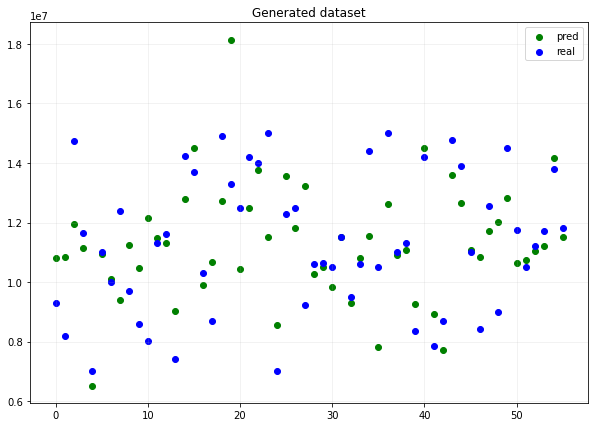

In [ ]:
plt.figure(figsize=(10, 7))
n = np.arange(test_predictions.shape[0])
plt.scatter(n, test_predictions, label='pred', c='g')
n2 = np.arange(y_test.shape[0])
plt.scatter(n2, y_test, label='real', c='b')
plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Создадим три файла: матрица признаков, вектор таргетов и объединенная.

In [ ]:
# X.to_excel('./feature_matrix.xlsx')
# y.to_excel('./targets.xlsx')
tmp = X
X['price'] = y
tmp = tmp.reset_index(drop=True)
X.to_excel('./all_matrix.xlsx', index=False)
# X.to_csv('./all_matrix.csv')

dummi переменная для количества комнат. 1ая/не 1ая, 2ая/не 2ая

In [ ]:
tmp['rooms'].value_counts()

1    111
2    109
3      4
Name: rooms, dtype: int64

In [ ]:
tmp['rooms_1'] = np.where(tmp['rooms'] == 1, 1, 0)

In [ ]:
tmp['rooms_1']

0      0
1      0
2      0
3      1
4      1
      ..
219    0
220    0
221    1
222    1
223    0
Name: rooms_1, Length: 224, dtype: int64

In [ ]:
tmp['rooms_2'] = np.where(tmp['rooms'] == 2, 1, 0)

In [ ]:
tmp.to_excel('./all_matrix2.xlsx', index=False)

In [ ]:
tmp.head(10)

,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,view,view_1,view_2,view_3,...,dist_metro,yr_built,district,novelty,enter_house,is_sao,type_dist,price,rooms_1,rooms_2
0,0,2,51.0,32.0,8.5,17,1,1,0,0,...,9,2015.0,2,1,0,1,0,11600000,0,1
1,1,2,52.9,28.1,12.0,22,1,1,0,0,...,11,2016.0,2,1,0,1,11,12900000,0,1
2,1,2,45.0,30.0,6.0,12,2,0,1,0,...,4,1966.0,2,0,0,1,4,9100000,0,1
3,1,1,36.0,17.0,10.0,20,1,1,0,0,...,10,2018.0,1,1,0,0,10,10600000,1,0
4,1,1,35.0,19.4,8.0,5,1,1,0,0,...,11,1961.0,2,0,0,1,11,8900000,1,0
5,1,2,57.5,32.0,7.2,5,1,1,0,0,...,8,1958.0,2,0,0,1,8,12000000,0,1
6,1,2,57.5,37.0,8.5,8,0,0,0,1,...,9,1961.0,2,0,0,1,9,11000000,0,1
7,1,3,60.0,42.0,6.0,9,1,1,0,0,...,1,1967.0,2,0,0,1,1,11700000,0,0
8,0,1,35.7,20.0,7.0,19,0,0,0,1,...,13,2020.0,2,1,0,1,0,8150310,1,0
9,0,1,38.9,13.6,11.3,25,0,0,0,1,...,9,2021.0,2,1,1,1,0,8528211,1,0


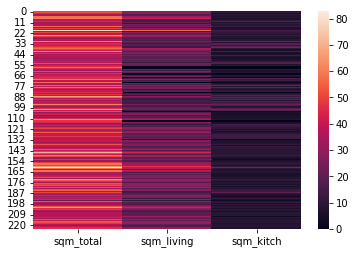

In [ ]:
import seaborn as sns
sns.heatmap(tmp.loc[:,'sqm_total':'sqm_kitch'])

In [ ]:
tmp.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,type_sale,rooms,sqm_total,sqm_living,sqm_kitch,floors,view,view_1,view_2,view_3,bathroom_1.0,bathroom_2.0,bathroom_3.0,type,type_1_4,type_2_5,dist_metro,yr_built,district,novelty,enter_house,is_sao,type_dist,price,rooms_1,rooms_2
type_sale,1.00,0.07,-0.17,0.20,-0.46,-0.53,0.17,0.23,-0.06,-0.30,0.31,-0.15,-0.28,-0.28,0.33,0.19,-0.04,-0.61,0.02,-0.57,-0.81,0.04,0.65,-0.14,-0.08,0.07
rooms,0.07,1.00,0.64,0.57,0.01,-0.07,0.13,-0.03,-0.03,-0.05,0.33,-0.43,0.26,-0.11,-0.00,0.06,0.01,-0.11,-0.12,-0.11,-0.04,0.16,0.05,0.34,-0.97,0.87
sqm_total,-0.17,0.64,1.00,0.55,0.32,0.14,0.09,-0.13,0.02,0.04,0.26,-0.43,0.39,-0.09,-0.06,-0.09,0.04,0.15,-0.15,0.16,0.09,0.17,-0.14,0.51,-0.62,0.55
sqm_living,0.20,0.57,0.55,1.00,0.16,-0.10,0.13,0.18,-0.04,-0.23,0.42,-0.43,0.06,-0.26,0.18,0.05,0.05,-0.32,-0.12,-0.30,-0.22,0.13,0.15,0.11,-0.54,0.47
sqm_kitch,-0.46,0.01,0.32,0.16,1.00,0.41,-0.18,-0.16,-0.01,0.27,-0.10,-0.05,0.29,0.06,-0.12,-0.26,0.04,0.39,-0.12,0.35,0.45,-0.10,-0.30,0.19,-0.00,-0.01
floors,-0.53,-0.07,0.14,-0.10,0.41,1.00,-0.06,-0.16,0.15,0.13,-0.31,0.20,0.19,0.33,-0.23,-0.29,-0.08,0.73,0.02,0.68,0.51,-0.01,-0.39,0.34,0.05,-0.04
view,0.17,0.13,0.09,0.13,-0.18,-0.06,1.00,-0.25,0.54,-0.68,0.14,-0.15,0.06,-0.04,0.02,0.16,-0.01,-0.20,0.13,-0.16,-0.12,0.09,0.08,0.15,-0.12,0.11
view_1,0.23,-0.03,-0.13,0.18,-0.16,-0.16,-0.25,1.00,-0.57,-0.49,0.14,-0.02,-0.23,-0.14,0.19,0.05,0.13,-0.21,-0.08,-0.24,-0.19,0.07,0.28,-0.24,0.05,-0.06
view_2,-0.06,-0.03,0.02,-0.04,-0.01,0.15,0.54,-0.57,1.00,-0.24,-0.09,-0.00,0.19,0.18,-0.06,-0.02,-0.11,0.11,0.21,0.10,0.09,-0.10,-0.15,0.12,0.02,0.00
view_3,-0.30,-0.05,0.04,-0.23,0.27,0.13,-0.68,-0.49,-0.24,1.00,-0.19,0.12,0.09,0.09,-0.16,-0.15,-0.06,0.28,-0.10,0.29,0.22,-0.08,-0.25,0.06,0.04,-0.02
